# Rayleigh Fading with Positive ZOCs

_Author:_ Karl-Ludwig Besser, Technische Universität Braunschweig

This notebook is part of the paper "On the Set of Joint Rayleigh Fading Distributions Achieving Positive Zero-Outage Capacities" ([doi:XXX](https://doi.org/XXX)).  
If you use any of this work, please cite the above paper.

> If you are not familiar with Jupyter notebooks: The easiest way to use this notebook interactively, is to hit `Kernel --> Restart & Run All` in the menu. The will execute all cells and enable the interactive elements of the plots.  
> Alternatively, you can execute the cells one by one using Shift+Return

In [1]:
import numpy as np
from scipy import stats
from scipy import optimize
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact

In [2]:
#https://docs.python.org/3/library/itertools.html#itertools-recipes
from itertools import tee
def pairwise(iterable):
    "s -> (s0,s1), (s1,s2), (s2, s3), ..."
    a, b = tee(iterable)
    next(b, None)
    return zip(a, b)

In [10]:
from rayleigh_fading import zero_outage_capacity
from copulas import zoc_copula2

## Joint Distributions

In the following, we show that joint distributions exist, for which two Rayleigh fading links can achieve a positive zero-outage capacity (ZOC).

The maximum ZOC is achieved by countermonotonic fading coefficients. Using a parameterized copula, we show that there exist joint distributions corresponding to each ZOC between zero and the maximum.

This means that there is an infinite number of joint distributions with positive ZOCs.

In [11]:
def _opt_x(x, t, rv_x, rv_y):
    return rv_y.pdf(rv_y.ppf(t-rv_x.cdf(x)))-rv_x.pdf(x)

def plot_joint_density():
    a, stepsize = np.linspace(0, 5, 150, retstep=True)
    A, B = np.meshgrid(a, a)
    fig, ax = plt.subplots(1,1)
    def plot_copula(t=.5, snr_x_db=0, snr_y_db=0):
        snr_x = 10**(snr_x_db/10.)
        snr_y = 10**(snr_y_db/10.)
        rv_x = stats.expon(scale=snr_x)
        rv_y = stats.expon(scale=snr_y)
        cdf_x = rv_x.cdf(A)
        cdf_y = rv_y.cdf(B)
        joint_cdf = zoc_copula2(cdf_x, cdf_y, t=t)
        ax.clear()
        _gradx = np.gradient(joint_cdf, stepsize, axis=0)
        joint_pdf = np.gradient(_gradx, stepsize, axis=1)
        ax.set_xlim([0, 5])
        ax.set_ylim([0, 5])
        ax.pcolormesh(A, B, joint_pdf, vmin=0)
        #TODO: Add xopt for Rayleigh fading
        ax.plot(a, rv_y.ppf(t-rv_x.cdf(a)), 'r-')
        ax.plot([0, rv_y.ppf(t)], [rv_y.ppf(t), 0], 'w--')
        ax.plot([0, rv_x.ppf(t)], [rv_x.ppf(t), 0], 'w--')
    interact(plot_copula, t=(0, 1, .05), snr_x_db=(-5, 10, 1), snr_y_db=(-5, 10, 1))

<IPython.core.display.Javascript object>


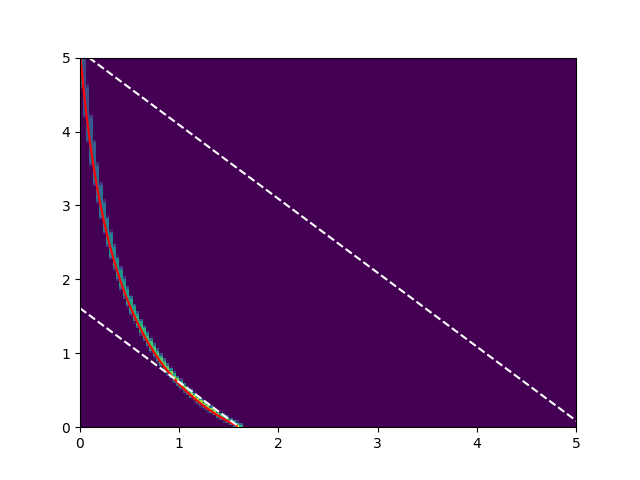

interactive(children=(FloatSlider(value=0.5, description='t', max=1.0, step=0.05), IntSlider(value=0, descript…

In [12]:
plot_joint_density()

## Influence of the Channel Qualities on the ZOC

In the following, we show the influence of the channel qualities, i.e., SNR, of the two fading links on the achievable ZOC.

In [8]:
def plot_zero_out_lambda():
    snr_db = np.linspace(-5, 15, 50)
    SNR_X_DB, SNR_Y_DB = np.meshgrid(snr_db, snr_db)
    SNR_X = 10**(SNR_X_DB/10.)
    SNR_Y = 10**(SNR_Y_DB/10.)
    fig, ax = plt.subplots(1,1)
    def plot_copula(t=.5, alpha_x=1, alpha_y=1):
        LX = 1/(SNR_X*alpha_x)
        LY = 1/(SNR_Y*alpha_y)
        ax.clear()
        ax.set_xlim([min(snr_db), max(snr_db)])
        ax.set_ylim([min(snr_db), max(snr_db)])
        ax.set_xlabel("$\\rho_x$ [dB]")
        ax.set_ylabel("$\\rho_y$ [dB]")
        capac = zero_outage_capacity(t, LX, LY)
        ax.pcolormesh(SNR_X_DB, SNR_Y_DB, capac, vmin=0, vmax=5, alpha=.5)
        if t > 0:
            _contour = ax.contour(SNR_X_DB, SNR_Y_DB, capac, vmin=0)
            ax.clabel(_contour, inline=1, fontsize=9)
    interact(plot_copula, t=(0, 1, .01), alpha_x=(.5, 2, .1), alpha_y=(.5, 2, .1))

<IPython.core.display.Javascript object>


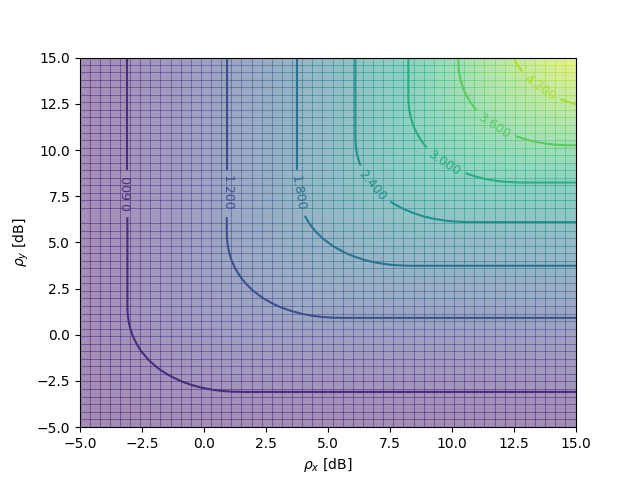

interactive(children=(FloatSlider(value=0.5, description='t', max=1.0, step=0.01), FloatSlider(value=1.0, desc…

In [9]:
plot_zero_out_lambda()